In [1]:
do_on_task_plots import product as iterproduct
import pandas as pd
import seaborn as sb
sb.set("paper")
import matplotlib.pyplot as plt

from blue_zero.qnet import QNet
from blue_zero.agent import QAgent
from blue_zero.mode import mode_registry

def play_agent_on_mode(trained_mode=0, game_mode=0, n=15, p=0.8, games=1000, models_root="/app/"):
    trained_file = models_root + f"/mode{trained_mode}/{n}/trained_model.pt"
    net = QNet.load(trained_file)
    agent = QAgent(net)
    envs = [mode_registry[game_mode].from_random((n, n), p) for _ in range(games)]
    agent.play(envs)
    return [e.steps_taken for e in envs]


def get_steps_df(n=15, p=0.8, games=1000, models_root="/app/"):    
    results = {}
    for trained_mode, game_mode in iterproduct((0,3), (0,3)):
        steps = play_agent_on_mode(trained_mode, game_mode, n=n, p=p, games=games, models_root=models_root)
        results[(trained_mode, game_mode)] = steps
    steps_df = pd.DataFrame(results)
    steps_df.columns.names = ["trained_on", "played_on"]
    return steps_df

def do_plot(a,b, steps_df):
    sb.kdeplot(x=(a,b), data=steps_df, bw_adjust=1.4, cut=0, label=f"{a} on {b}")
    plt.gca().set_xlabel("steps to completion")
    plt.legend()

def do_on_task_plot(steps_df):
    plt.figure(figsize=(5,5))
    do_plot(0,0, steps_df)
    do_plot(3,3, steps_df)
    plt.savefig("on_task.png")

def do_off_task_plot(steps_df):
    plt.figure(figsize=(5,5))
    do_plot(0, 3, steps_df)
    do_plot(3, 0, steps_df)
    plt.savefig("off_task.png")
    

In [3]:
steps_df = get_steps_df(n=20, p=.8, games=1000)

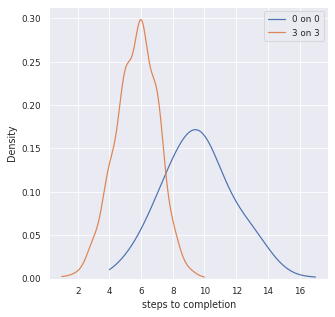

In [4]:
do_on_task_plot(steps_df)

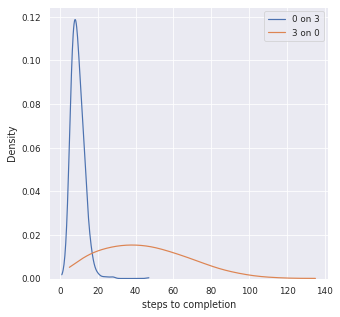

In [5]:
do_off_task_plot(steps_df)